![AB Testing](https://media.licdn.com/dms/image/C5612AQHvj8HVBVoM-w/article-cover_image-shrink_600_2000/0/1589211560935?e=1692835200&v=beta&t=ixmTZYYp1zjPhHAoc4AXHgABWgUCOoqv7_I0TNNoW2c)

# WHAT IS THE AB TESTING ?

A/B testing, also known as split testing, is a method of comparing two variants(A and B) to determine which one performs better. In A/B testing, two variants (A and B) are created with one element of the design or content being different between the two variants. The two versions are then shown randomly to users, and their behavior is monitored and compared to determine which variant performs better based on a predefined goal, such as the conversion rate, click-through rate, or engagement rate.

A/B testing is commonly used in website optimization, digital marketing, and product development to determine which variant is more effective at achieving a specific goal. It helps businesses make data-driven decisions by providing insight into what resonates better with their audience and what changes can be made to improve the user experience and increase conversions.

# Hypothesis Testing

Hypothesis tests are analytical tools used as a statistical method. These tests aim to test a hypothesis (claim) about a population using sample data. Hypothesis tests help us make inferences about whether a hypothesis is true or not by collecting statistical evidence.

Generally, two hypotheses are formulated: the null hypothesis (H0) and the alternative hypothesis (H1 or HA). The null hypothesis represents the existing condition or the accepted assumptions, while the alternative hypothesis claims a specific change or effect.

Hypothesis tests can be categorized into the following types:

- **One-Sample T Test:** Used to test if the mean of a population is significantly different from a specific value.

- **Independent Two-Sample T Test:** Used to test if there is a significant difference between the means of two independent groups.

- **Paired Two-Sample T Test:** Used to test if there is a significant difference between the means of two related or paired groups.

- **Analysis of Variance (ANOVA):** Used to test if there is a significant difference among the means of three or more groups.

- **Chi-Square Test:** Used to test if there is a dependency or association between two categorical variables.

- **Regression Analysis:** Used to analyze the relationship between dependent and independent variables.

These are just some popular types of hypothesis tests, and there are many more methods available in statistics. Hypothesis tests are used in various fields, ranging from scientific research and marketing strategies to medical studies and industrial quality control processes. These tests enable us to make objective decisions based on data and evaluate statistical significance.

- Hypothesis tests are statistical methods used to test a belief or proposition.

- Within the scope of hypothesis testing, there are group comparisons.

- The main objective in group comparisons is to determine whether observed differences are due to chance or if there is a genuine difference.

**For example:**

- Did the average daily usage time of users increase after a user interface change in a mobile application?

- The result we obtain from this analysis, based on the sample we have, will help us determine if the observed outcome occurred by chance or if there is indeed a significant difference.

- We will strive to understand this through statistical calculations and analysis. We will provide evidence to support our findings.

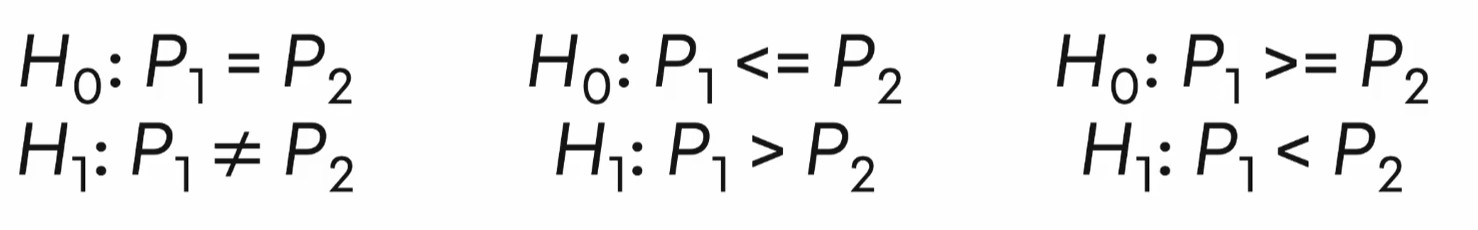

# AB Testing (Two Sample Proportion Test)

- This test is used to make a comparison between two ratios.
- Before we had averages. Now we have ratios. We will try to see if there is a statistically significant difference between these ratios.
- The assumption of this test is that the sample size should be greater than 30. But usually the sample size is greater than 30.

# Road Map
1. Set up Hypotheses
2. Assumption Check
    - 2.1. Assumption of Normality
    - 2.2. Variance Homogeneity
3. Implementation of the Hypothesis
    - 3.1. If the assumptions are met, independent two sample t test (parametric test)
    - 3.2.If assumptions are not met, mannwhitneyu test (non-parametric test)
4. Interpret results according to p-value

In [1]:
# import Required Libraries

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Exercise 6: Is There a Statistically Significant Difference between the Survival Rates of Women and Men?

In [3]:
# H0: p1 = p2 There is no statistically significant difference between the survival rates of women and men.

# H1: p1 != p2 There is a Statistically Significant Difference between the Survival Rates of Women and Men.

In [4]:
# Loading the Data Set

df = sns.load_dataset("titanic")

In [5]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(891, 15)
##################### Types #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
                 ...   
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
Length: 15, dtype: object
##################### Head #####################
   survived  pclass     sex      age  sibsp  parch     fare embarked  class  \
0         0       3    male 22.00000      1      0  7.25000        S  Third   
1         1       1  female 38.00000      1      0 71.28330        C  First   
2         1       3  female 26.00000      0      0  7.92500        S  Third   
3         1       1  female 35.00000      1      0 53.10000        S  First   
4         0       3    male 35.00000      0      0  8.05000        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  

In [6]:
df.loc[df["sex"] == "female", "survived"].mean()

0.7420382165605095

In [7]:
df.loc[df["sex"] == "male", "survived"].mean()

0.18890814558058924

In [8]:
female_succ_count = df.loc[df["sex"] == "female", "survived"].sum()

In [9]:
female_succ_count

233

In [10]:
male_succ_count = df.loc[df["sex"] == "male", "survived"].sum()

In [11]:
male_succ_count

109

In [12]:
test_stat, pvalue = proportions_ztest(count=[female_succ_count, male_succ_count],
                                      nobs=[df.loc[df["sex"] == "female", "survived"].shape[0],
                                            df.loc[df["sex"] == "male", "survived"].shape[0]])

In [13]:
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 16.2188, p-value = 0.0000


In [14]:
# Since the p-value is less than 0.05, hypothesis H0 is rejected.
# There is a statistically significant difference between the two ratios.

# There is a Statistically Significant Difference between the Survival Rates of Women and Men.